<a href="https://colab.research.google.com/github/cosmicishan/Classification-on-Income/blob/main/Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

* A census is a strategy of efficiently procuring and recording data around the individuals of a given populace. The census may be an extraordinary, wide-range activity, which takes place once a decade within the whole nation. The reason is to accumulate data around the common populace, to show a full and solid picture of the populace within the nation - its lodging conditions and statistic, social and financial characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

* The goal of this Assignment is to predict whether a person makes over 50K a year or not given their demographic variation. 

# **Import Dependencies**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **Import Data**

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Datasets/Adult Income/adult.data.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Datasets/Adult Income/adult.test.csv", skiprows = 1)

Since the CSV file has no column name mentioned in it, I add it explicitly and in-text file the first row only contains the single value I skipped.

In [ ]:
cols = ['age',	'workclass',	'fnlwgt', 'education',	'educational-num', 'marital-status', 'occupation', 'relationship', 'race',	'gender', 'capital-gain', 'capital-loss', 'hours-per-week',	'native-country', 'income']

df_train.columns = cols
df_test.columns = cols

# **Checking Dataset Statistics**

In [ ]:
df_train.shape

(32560, 15)

In [ ]:
df_test.shape

(16280, 15)

In [ ]:
df_train.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [ ]:
df_test.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   education        32560 non-null  object
 4   educational-num  32560 non-null  int64 
 5   marital-status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   gender           32560 non-null  object
 10  capital-gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours-per-week   32560 non-null  int64 
 13  native-country   32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              16280 non-null  int64 
 1   workclass        16280 non-null  object
 2   fnlwgt           16280 non-null  int64 
 3   education        16280 non-null  object
 4   educational-num  16280 non-null  int64 
 5   marital-status   16280 non-null  object
 6   occupation       16280 non-null  object
 7   relationship     16280 non-null  object
 8   race             16280 non-null  object
 9   gender           16280 non-null  object
 10  capital-gain     16280 non-null  int64 
 11  capital-loss     16280 non-null  int64 
 12  hours-per-week   16280 non-null  int64 
 13  native-country   16280 non-null  object
 14  income           16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_test.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.00000,16280.000000,16280.000000
mean,38.768305,1.894334e+05,10.073096,1081.97156,87.904668,40.392260
std,13.849192,1.057177e+05,2.567511,7584.16416,403.117078,12.479715
min,17.000000,1.349200e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.167162e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.778295e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,3770.000000,99.000000


# **Data Cleaning**

Turning Dependent Variable *income* from Object to Int datatype by replacing values with 0 and 1.

In [ ]:
df_train['income'] = df_train['income'].map({' <=50K': 0, ' >50K': 1})
df_test['income'] = df_test['income'].map({' <=50K.': 0, ' >50K.': 1})

In [ ]:
df_train['income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64

In [ ]:
df_test['income']

0        0
1        1
2        1
3        0
4        0
        ..
16275    0
16276    0
16277    0
16278    0
16279    1
Name: income, Length: 16280, dtype: int64

Dataset shows that there are no missing values. But when we see thae dataset above (using head()), it shows that the dataset contains values coded as **`?`**. So, I will encode **`?`** as **NaN** values.

#### Encode **?** as **NaN**s

In [ ]:
df_train[df_train == ' ?'] = np.nan
df_test[df_test == ' ?'] = np.nan

Check info of Data again to see how many missing values is there

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        30724 non-null  object
 2   fnlwgt           32560 non-null  int64 
 3   education        32560 non-null  object
 4   educational-num  32560 non-null  int64 
 5   marital-status   32560 non-null  object
 6   occupation       30717 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   gender           32560 non-null  object
 10  capital-gain     32560 non-null  int64 
 11  capital-loss     32560 non-null  int64 
 12  hours-per-week   32560 non-null  int64 
 13  native-country   31977 non-null  object
 14  income           32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              16280 non-null  int64 
 1   workclass        15317 non-null  object
 2   fnlwgt           16280 non-null  int64 
 3   education        16280 non-null  object
 4   educational-num  16280 non-null  int64 
 5   marital-status   16280 non-null  object
 6   occupation       15314 non-null  object
 7   relationship     16280 non-null  object
 8   race             16280 non-null  object
 9   gender           16280 non-null  object
 10  capital-gain     16280 non-null  int64 
 11  capital-loss     16280 non-null  int64 
 12  hours-per-week   16280 non-null  int64 
 13  native-country   16006 non-null  object
 14  income           16280 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.9+ MB


The features Workclass, Occupation and Native Country have missing values and these 3 are categorical Variables. So, we can impute them with ***mode*** (most frequent value).

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

Confirm again if any variables have Missing Values

In [ ]:
df_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Above output shows that there's no missing Values

# **Exploratory Data Analysis**

### Checking Summary of numerical variables

In [ ]:
df_train.drop('income', axis = 1).describe(include=["int64"])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observations :**

**age :** 

-> The difference between mean & median is not high but the difference between the 3rd quartile & maximum made the distribution right-skewed.


**fnlwgt :**

-> Final weight seems to be rightly skewed since there is a very large distance between median & maximum value as compared to minimum & median value.


**educational-num :**

-> The distribution seems a bit left-skewed since the mean is 10 and the max value is 16 which makes mean closer to the maximum value than the minimum value.


**capital-gain :**

-> For capital-gain, the mean is 1077.615172 and the median is 0, which shows that the distribution is exceedingly right-skewed. 

-> From the quartiles it is clearly unmistakable that 75% of observation is 0. 

-> Capital-gain is concentrated on the one specific esteem i.e. zero and others are spread after the 3rd quartile which comes about as the expansive standard deviation (7385.402999). 

-> Capital-gain appears that either an individual has no gain or has a gain of exceptionally expansive amount(10k or 99k).


**capital-loss :**

-> This attribute is similar to the capital gain i.e. most of the values are centered on 0(this can be told using the summary statistic as a minimum is 0 and values lie under 75 percentile is also zero.

-> The mean is 87 but the median is 0(i.e. mean is greater than the median this tells us that it is right-skewed distribution.


**hours-per-week :**

-> The IQR is very less i.e., [40-45] which indicates that 50% of the observations are concentrated between 40 & 45 which means observations are very sparse below the 25th percentile and after the 75th percentile.

-> Using quartiles we can say that data is approximately symmetric.


### Checking Summary and count of categorical variables

In [ ]:
df_train.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27815,21789,29752


**Observation :**


* Native-country has the most extraordinary number of unique categories i.e. 41 categories since it is significantly one-sided toward the US which has a repeat of 29752 out of include up to 32560(nearly 91.3%). 

* Occupation has more or less uniform distribution in categories as compared to the other traits. 

* Race in addition one-sided to the white race category(27815) with 85.4%. 

* The leading category in the work class is Private having a frequency(24532) and percentage(75.3%).

### Visualize the correlations between numerical features of the data.

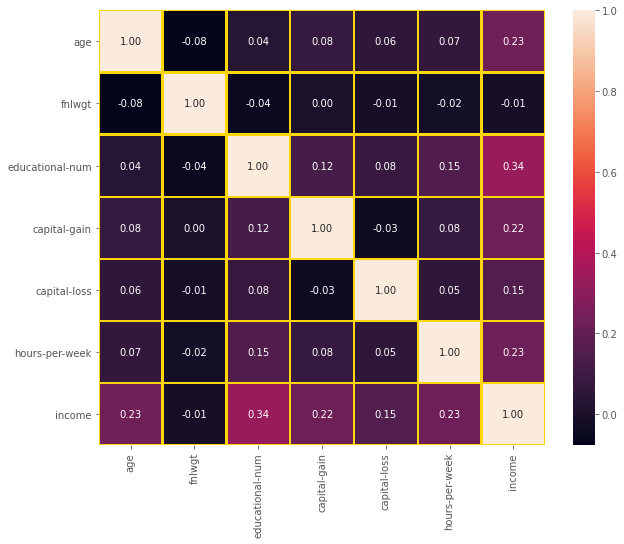

In [ ]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,8))
sns.heatmap(df_train.corr(),robust=True,fmt='.2f',linewidths=1.3,linecolor = 'gold', annot=True,);

**Observation :**

* There is not much strong correlation among the numeric attributes.

* There is neither strong positive nor strong negative correlation present in any variable .

* The strongest correlation is present between *capital gain* and *hours-per-week* with Coefficient .08 (which is less than 0.1, it means that very small correlation among them).

* We can see that the dependent feature *‘income’* is highly correlated with *age*, *education*, *capital gain*, and *hours-per-week*.

### Bivariate Analysis

#### Analysis between *age*, *capital-gain*

Text(0, 0.5, 'Capital Gain')

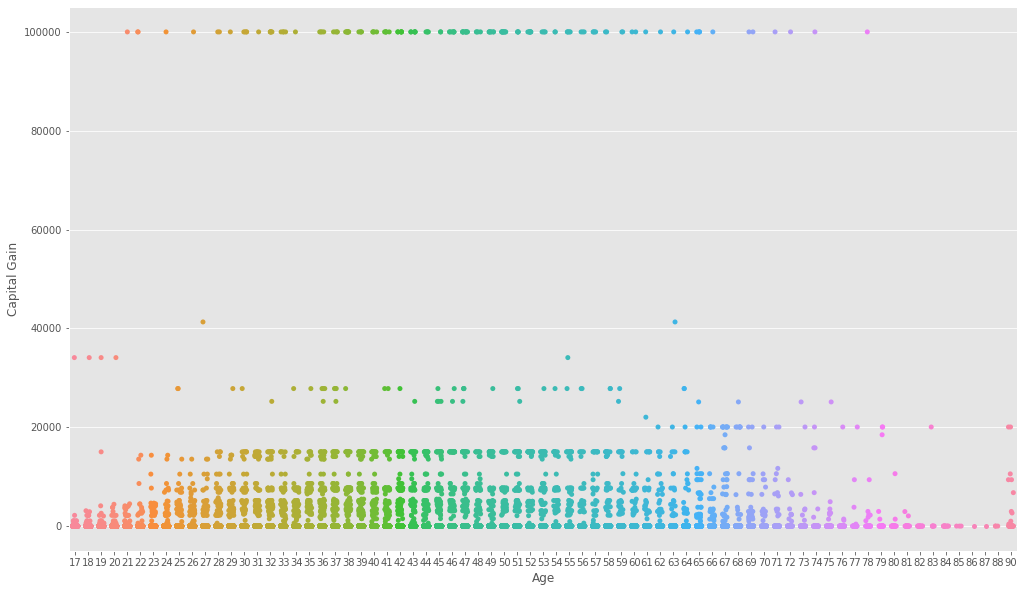

In [ ]:
fig = plt.figure(figsize = (17,10))
sns.stripplot('age', 'capital-gain', data = df_train, jitter = 0.2)
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12)

**Observations :**

* Between age 28 and 64 *capital-gain* is upto 15000 and after that it decreases and again increments at age 90

* *Age* 90 doesn't follow the pattern.

* *Capital-gain* of 99999 is clearly a outlier .

In [ ]:
cols = ['workclass', 'occupation']
cat_col = df_train.dtypes[df_train.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(df_train[df_train['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
 Private             35
 Local-gov            4
 Self-emp-not-inc     3
 Federal-gov          1
Name: workclass, dtype: int64
=======================================occupation=========================
 Prof-specialty       12
 Exec-managerial       8
 Other-service         6
 Adm-clerical          4
 Sales                 3
 Craft-repair          3
 Machine-op-inspct     3
 Transport-moving      1
 Farming-fishing       1
 Handlers-cleaners     1
 Protective-serv       1
Name: occupation, dtype: int64


At age 90, people can't work in goverment or private sectors. But there are some observations present in our dataset which shows that despite the age of 90 years they work in those sectors.

#### Analysis between *Hours-per-week*, *capital-gain*

Text(0, 0.5, 'Capital Gain')

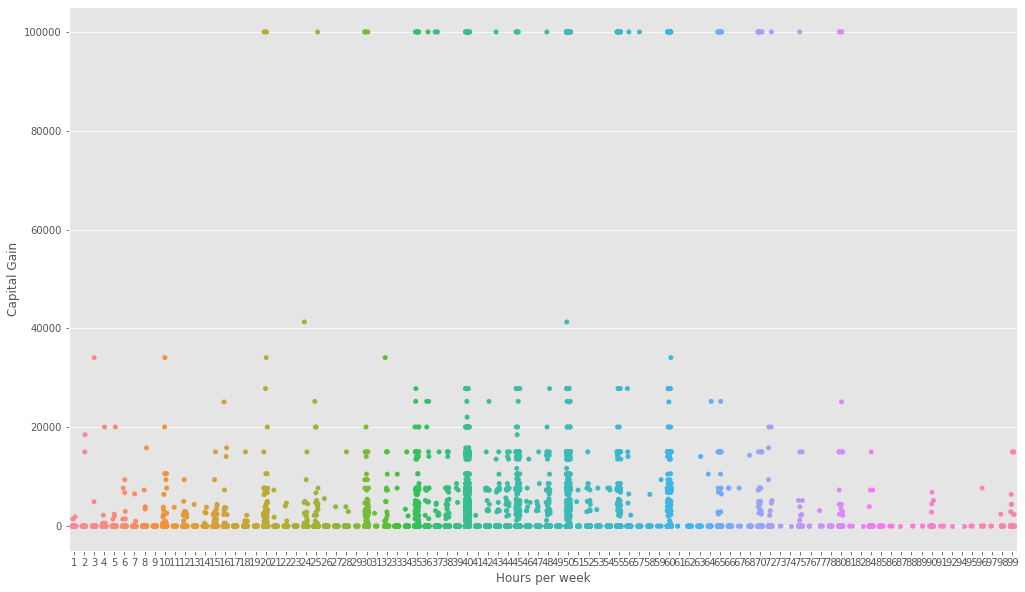

In [ ]:
fig = plt.figure(figsize = (17,10))
sns.stripplot('hours-per-week', 'capital-gain', data = df_train, jitter = 0.2)
plt.xlabel('Hours per week',fontsize = 12)
plt.ylabel('Capital Gain',fontsize = 12)

**Obversation :**

* Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.

* There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

### Multivariate Analysis

#### Analysis between *income*, *hours-per-week*, *gender*

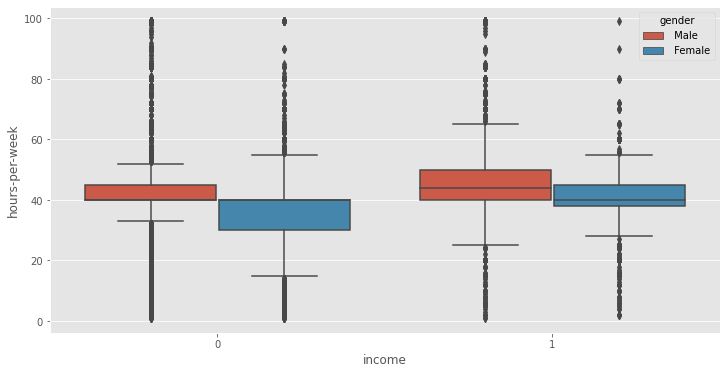

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data = df_train)
plt.show()

**Obversation :**


* The median *hours-per-week* for females is lower than the males in the Income group who earns <= 50k.

* Females have more flexible working hours per week in the income groups who earns <= 50k

* Males have more flexible working hours per week in the income groups who earns <= 50k

#### Analysis between *income*, *age*, *gender*

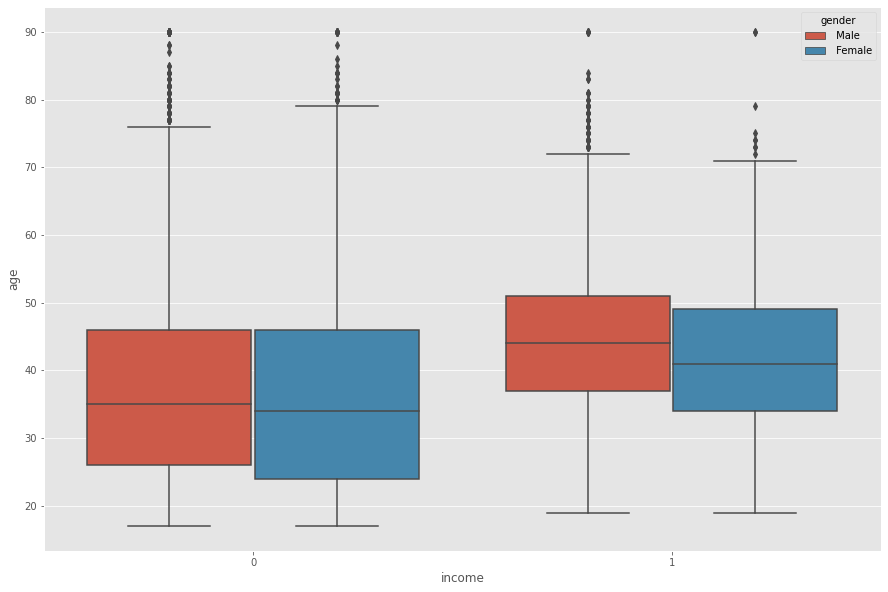

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender", data=df_train)
plt.show()

**Obversation :**

* Median *age* of Females who earn less than 50k has very minute difference than the Median *age* of males who earn less than 50k.

* But the Median *age* of Females who earn greater than 50k has age difference of 2-3 years than the Median *age* of males who earn greater than 50k.

### Visualising Pair Plots

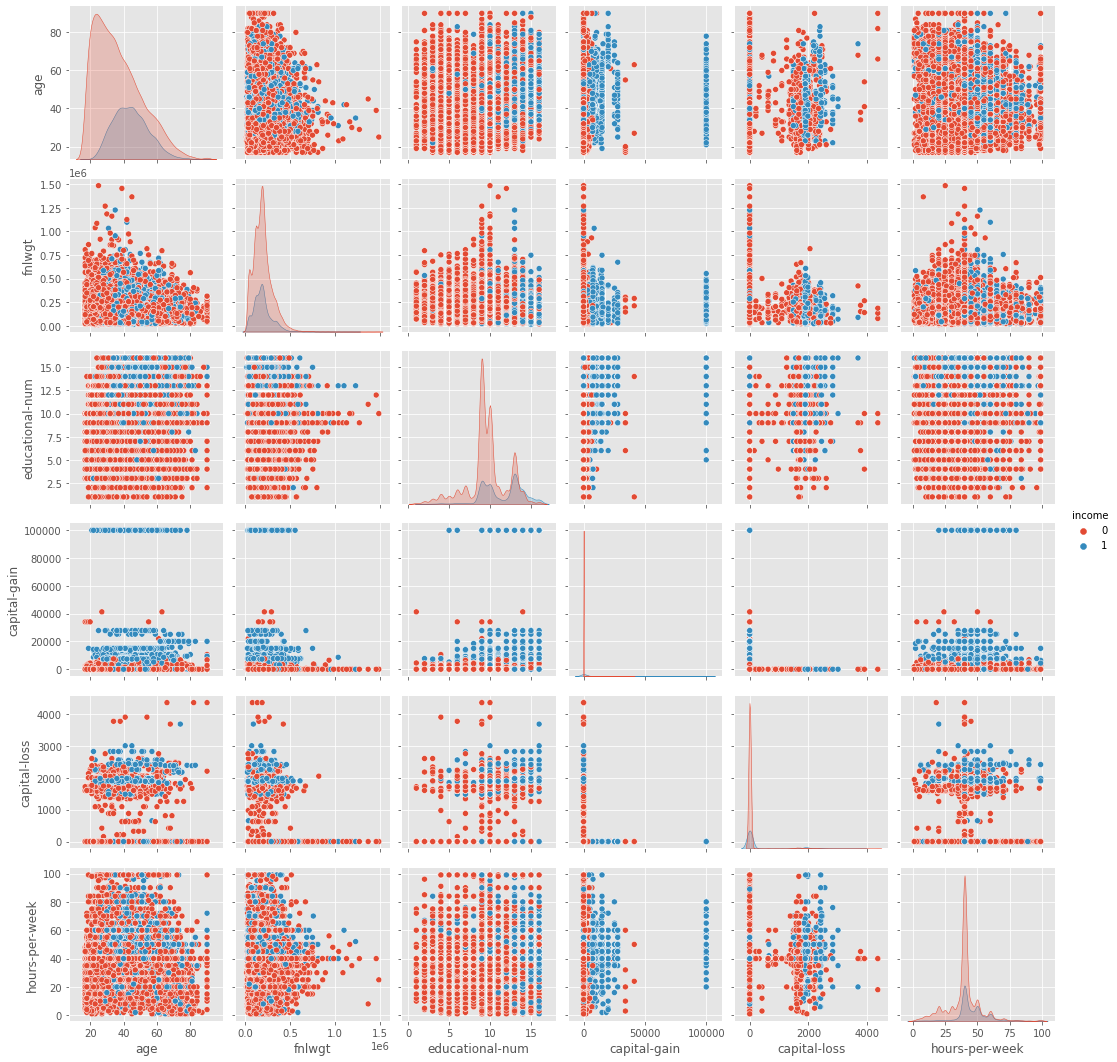

In [ ]:
sns.pairplot(df_train, hue="income")

*Observation :*

* This plot is not much informative at and there's some overlapping among some features that makes it tough to classify the status.

* There are other features as well that makes it easy to seperate both of the classes of Dependent Variable.

# **Model Building**

#### Applying Label Encoding to Categorical Variables

The object columns in the dataset need to be encoded. This can be done using Label Encoder using the sklearn’s pre-processing library.

In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])

#### Getting train and test variables

In [ ]:
X_train = df_train.drop(['income'], axis=1)
y_train = df_train['income']

X_test = df_test.drop(['income'], axis=1)
y_test = df_test['income']

#### Using StandardScalar to normalise the dataset

In [ ]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Scaling the variable can help to give better performance in model predicting because it basically helps to normalize the data within a particular range. It helps in speeding up the calculations in an algorithm. This will brought features into the distances that are more comparable than they were before we applied scaling.

## **Implementing Models**

### **K-nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

### **Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

### **Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

### **Gaussian Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

### **Support Vector Machine**

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

### Accuracy of the used algorithms to find the best fit

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
89.73,KNN
82.46,Support Vector Machines
82.45,Logistic Regression
80.58,Gaussian Naive Bayes


### Finding significance of each feature in the best fit model

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
fnlwgt,0.173
age,0.152
capital-gain,0.115
relationship,0.104
educational-num,0.090
hours-per-week,0.086
marital-status,0.067
occupation,0.065
workclass,0.038


### Plotting the significance of each feautre to find the best variables for model

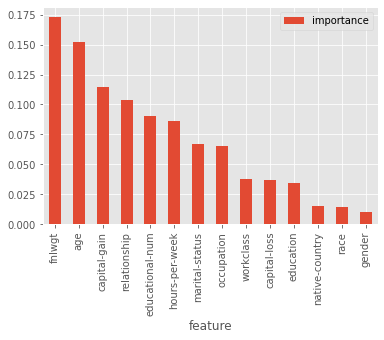

In [ ]:
importances.plot.bar()

Since columns - *gender*, *race*, and *native-country* hardly have any significance, can drop these columns to avoid overfitting

In [ ]:
X_train = X_train.drop(['gender', 'race', 'native-country'], axis = 1)
X_test = X_test.drop(['gender', 'race', 'native-country'], axis = 1)

#### Using the **Random Forest** (best model) after removing non-significant variables

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc = round(acc_random_forest,2)
print("Accuracy - " + str(acc) + "%")

Accuracy - 99.99%


The accuracy remains the same even after dropping the columns. So, it can be observed that removing insignificant variables can help us to train model with less variables which can take less time for complex models like neural networks.

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, Y_prediction)
cm

array([[11532,   902],
       [ 1481,  2365]])

### **Summary**

* The reason Random Forest and Decision Tree work better than other algorithms is that Random Forest is very flexible and gives high accuracy as it overcomes the problem of overfitting by combining the results of multiple decision trees, i.e., it uses ensemble method which improves the performance compared to single model.

* Even for large datasets, Random Forest give a good performance. It uses classification trees as building blocks and constructs many (a forest of) classification trees from data to build a predictive model.